In [241]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.ticker as ticker

%matplotlib inline 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df2020 = pd.read_csv('survey_results2020.csv')
df2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
df2020.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [4]:
df2020.LanguageWorkedWith.unique()

array(['C#;HTML/CSS;JavaScript', 'JavaScript;Swift',
       'Objective-C;Python;Swift', ...,
       'Bash/Shell/PowerShell;C;C++;Go;HTML/CSS;JavaScript;Kotlin;Python;Ruby;Rust;SQL',
       'Bash/Shell/PowerShell;C#;C++;HTML/CSS;JavaScript;Kotlin;PHP;SQL;VBA',
       'Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;JavaScript;Objective-C;Python;Swift'],
      dtype=object)

In [5]:
languages = df2020.LanguageWorkedWith.unique()

In [6]:
#remove nan from list 
languages = [x for x in languages if str(x) != 'nan']

In [8]:
#create a new list and iterate through the unique Prog. lang. and splitting the strings 
lang2020 = []
for i in range(0, len(languages)-1):
    element = languages[i].split(';')
    lang2020 += element

lang2020 = [x.lower().replace(" ", "") for x in lang2020] #removing spaces and lowering strings 

In [11]:
lang2020

['c#',
 'html/css',
 'javascript',
 'javascript',
 'swift',
 'objective-c',
 'python',
 'swift',
 'html/css',
 'ruby',
 'sql',
 'html/css',
 'java',
 'javascript',
 'c#',
 'html/css',
 'php',
 'python',
 'sql',
 'html/css',
 'javascript',
 'php',
 'html/css',
 'java',
 'javascript',
 'python',
 'sql',
 'c#',
 'javascript',
 'swift',
 'html/css',
 'javascript',
 'c',
 'javascript',
 'python',
 'html/css',
 'javascript',
 'sql',
 'typescript',
 'bash/shell/powershell',
 'c',
 'html/css',
 'java',
 'python',
 'sql',
 'bash/shell/powershell',
 'html/css',
 'java',
 'javascript',
 'kotlin',
 'r',
 'c#',
 'html/css',
 'javascript',
 'python',
 'sql',
 'vba',
 'bash/shell/powershell',
 'html/css',
 'perl',
 'bash/shell/powershell',
 'c#',
 'html/css',
 'javascript',
 'sql',
 'typescript',
 'java',
 'javascript',
 'sql',
 'bash/shell/powershell',
 'c#',
 'html/css',
 'java',
 'javascript',
 'objective-c',
 'scala',
 'sql',
 'swift',
 'typescript',
 'java',
 'python',
 'bash/shell/powershell',


In [12]:
lang2020 = set(lang2020) #geting unique prog. lang.
lang2020 = list(lang2020) #reconverting to a list again
lang2020

['objective-c',
 'go',
 'dart',
 'r',
 'sql',
 'java',
 'bash/shell/powershell',
 'ruby',
 'c++',
 'php',
 'assembly',
 'javascript',
 'kotlin',
 'perl',
 'rust',
 'typescript',
 'swift',
 'c#',
 'haskell',
 'scala',
 'julia',
 'python',
 'vba',
 'c',
 'html/css']

In [13]:
subset2020 = df2020[['Respondent', 'LanguageWorkedWith']] #substetting the data set with only the Prog. Lang. column
subset2020

,Respondent,LanguageWorkedWith
0,1,C#;HTML/CSS;JavaScript
1,2,JavaScript;Swift
2,3,Objective-C;Python;Swift
3,4,NaN
4,5,HTML/CSS;Ruby;SQL
...,...,...
64456,64858,NaN
64457,64867,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458,64898,NaN
64459,64925,HTML/CSS


In [14]:
subset2020.dropna(subset = ["LanguageWorkedWith"], inplace=True) #droping rows where Prog. Lang. value is Null
subset2020

,Respondent,LanguageWorkedWith
0,1,C#;HTML/CSS;JavaScript
1,2,JavaScript;Swift
2,3,Objective-C;Python;Swift
4,5,HTML/CSS;Ruby;SQL
5,6,HTML/CSS;Java;JavaScript
...,...,...
64447,63796,C#;HTML/CSS;Java;JavaScript;Swift
64453,64330,C++;HTML/CSS
64457,64867,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64459,64925,HTML/CSS


In [15]:
subset2020[lang2020] = 0 #filling dummy variable columns for all unique Prog. Lang. with zeros 

In [18]:
#removing temporarily c++ from the Prog. lang. unique list. because it raises some erorrs with the Regex 
lang2020.remove('c++')

#algorithm that iterates through the list of Prog. lang. and for each language set a 1 in the row,
#when the Prog. lang. is present
for lan in lang2020:
    subset2020.loc[subset2020['LanguageWorkedWith'].str.lower().str.contains(';{0};|;{0}$|^{0};|^{0}$'.format(lan), regex=True), lan] = 1

In [19]:
#filling the rows with 1 where c++ is present, escaping the + signs (errors with Regex)
subset2020.loc[subset2020['LanguageWorkedWith'].str.lower().str.contains(';c\+\+;|;c\+\+$|^c\+\+;|^c\+\+$', regex=True), 'c++'] = 1

In [20]:
subset2020

,Respondent,LanguageWorkedWith,objective-c,go,dart,r,sql,java,bash/shell/powershell,ruby,...,typescript,swift,c#,haskell,scala,julia,python,vba,c,html/css
0,1,C#;HTML/CSS;JavaScript,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2,JavaScript;Swift,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,Objective-C;Python;Swift,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,5,HTML/CSS;Ruby;SQL,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,6,HTML/CSS;Java;JavaScript,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64447,63796,C#;HTML/CSS;Java;JavaScript;Swift,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
64453,64330,C++;HTML/CSS,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
64457,64867,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
64459,64925,HTML/CSS,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
lang2020+=['c++'] # adding back c++ to the list of unique Prog. Lang.

In [22]:
subset2020_lang = subset2020[lang2020] #subseting the dataset with all unique Prog. lang. dummy variables columns 
subset2020_lang

,objective-c,go,dart,r,sql,java,bash/shell/powershell,ruby,php,assembly,...,swift,c#,haskell,scala,julia,python,vba,c,html/css,c++
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64447,0,0,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
64453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
64457,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
64459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
subset2020_lang.sum(axis=0).sort_values().reset_index() #summing by cols-summing each columns, will count the 1s-
#sorting the final counts by ascending orders-default
# reseting index -> obtain a dataframe of Prog. Lang. counts 

,index,0
0,julia,519
1,haskell,1222
2,perl,1796
3,scala,2052
4,dart,2280
5,objective-c,2340
6,rust,2929
7,r,3288
8,swift,3397
9,vba,3499


In [24]:
lang2020 = list(subset2020_lang.sum(axis=0).sort_values().reset_index()['index']) 
#extracting Prog. names after summation into a list

In [25]:
count2020 = list(subset2020_lang.sum(axis=0).sort_values().reset_index()[0])
#extracting Prog. lang counts according to list of names order

In [26]:
dfLang2020 = pd.DataFrame({'lang2020':lang2020, 'count':count2020})
dfLang2020
#creating the final dataframe of Prog. Lang. and their corresponding counts 

,lang2020,count
0,julia,519
1,haskell,1222
2,perl,1796
3,scala,2052
4,dart,2280
5,objective-c,2340
6,rust,2929
7,r,3288
8,swift,3397
9,vba,3499


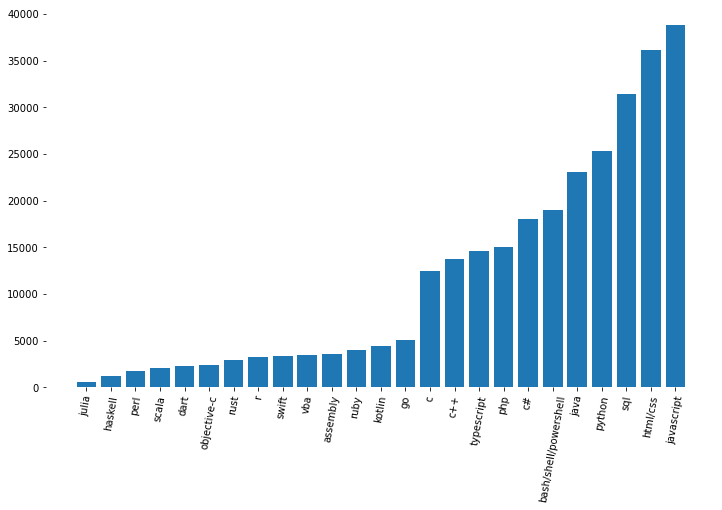

In [27]:
plt.figure(figsize=(12,7))
plt.bar(lang2020,count2020)
plt.xticks(rotation= 80)
plt.box(False)
plt.show()
#ploting a bar plot of the prog. lang. and their counts 

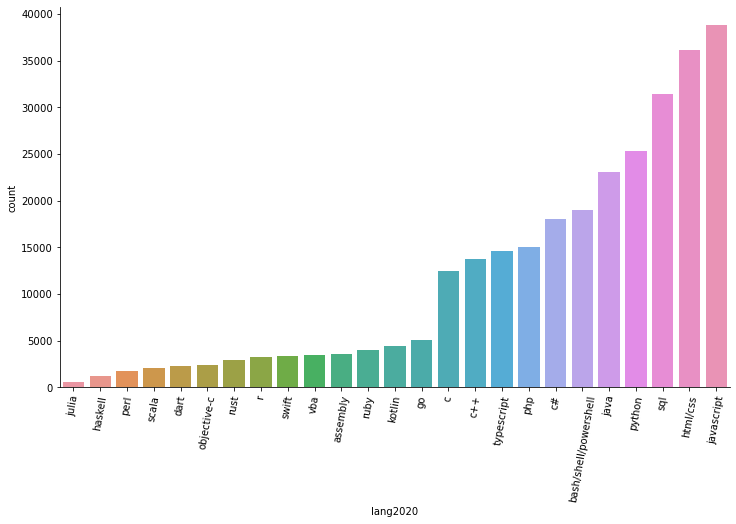

In [28]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=80)
ax = sns.barplot(
    x="lang2020", 
    y="count", 
    data=dfLang2020, 
    ci=None)

sns.despine(ax=ax , top=True, right=True, left=False, bottom=False);

***

In [47]:
df2020.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [55]:
df2020.MainBranch.unique()

array(['I am a developer by profession', 'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I am a student who is learning to code', nan], dtype=object)

In [81]:
df2019['JobSat'].unique()

array([nan, 'Slightly satisfied', 'Slightly dissatisfied',
       'Neither satisfied nor dissatisfied', 'Very satisfied',
       'Very dissatisfied'], dtype=object)

***

In [72]:
df2018 = pd.read_csv('survey_results2018.csv')
df2018.columns

Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       ...
       'Exercise', 'Gender', 'SexualOrientation', 'EducationParents',
       'RaceEthnicity', 'Age', 'Dependents', 'MilitaryUS', 'SurveyTooLong',
       'SurveyEasy'],
      dtype='object', length=129)

In [73]:
df2018.columns[:51]

Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       'YearsCoding', 'YearsCodingProf', 'JobSatisfaction',
       'CareerSatisfaction', 'HopeFiveYears', 'JobSearchStatus', 'LastNewJob',
       'AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5',
       'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9', 'AssessJob10',
       'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3',
       'AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6',
       'AssessBenefits7', 'AssessBenefits8', 'AssessBenefits9',
       'AssessBenefits10', 'AssessBenefits11', 'JobContactPriorities1',
       'JobContactPriorities2', 'JobContactPriorities3',
       'JobContactPriorities4', 'JobContactPriorities5', 'JobEmailPriorities1',
       'JobEmailPriorities2', 'JobEmailPriorities3', 'JobEmailPriorities4',
       'JobEmailPriorities5', 'JobEmailPriorities6', 'JobEmailPriorities7',
   

In [74]:
df2018.columns[51:100]

Index(['Currency', 'Salary', 'SalaryType', 'ConvertedSalary', 'CurrencySymbol',
       'CommunicationTools', 'TimeFullyProductive', 'EducationTypes',
       'SelfTaughtTypes', 'TimeAfterBootcamp', 'HackathonReasons',
       'AgreeDisagree1', 'AgreeDisagree2', 'AgreeDisagree3',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'FrameworkWorkedWith',
       'FrameworkDesireNextYear', 'IDE', 'OperatingSystem', 'NumberMonitors',
       'Methodology', 'VersionControl', 'CheckInCode', 'AdBlocker',
       'AdBlockerDisable', 'AdBlockerReasons', 'AdsAgreeDisagree1',
       'AdsAgreeDisagree2', 'AdsAgreeDisagree3', 'AdsActions',
       'AdsPriorities1', 'AdsPriorities2', 'AdsPriorities3', 'AdsPriorities4',
       'AdsPriorities5', 'AdsPriorities6', 'AdsPriorities7', 'AIDangerous',
       'AIInteresting', 'AIResponsible', 'AIFuture', 'EthicsChoice',
       'EthicsReport', 'EthicsRes

In [75]:
df2018.columns[100:]

Index(['EthicalImplications', 'StackOverflowRecommend', 'StackOverflowVisit',
       'StackOverflowHasAccount', 'StackOverflowParticipate',
       'StackOverflowJobs', 'StackOverflowDevStory',
       'StackOverflowJobsRecommend', 'StackOverflowConsiderMember',
       'HypotheticalTools1', 'HypotheticalTools2', 'HypotheticalTools3',
       'HypotheticalTools4', 'HypotheticalTools5', 'WakeTime', 'HoursComputer',
       'HoursOutside', 'SkipMeals', 'ErgonomicDevices', 'Exercise', 'Gender',
       'SexualOrientation', 'EducationParents', 'RaceEthnicity', 'Age',
       'Dependents', 'MilitaryUS', 'SurveyTooLong', 'SurveyEasy'],
      dtype='object')

In [78]:
df2018.JobSatisfaction.unique()

array(['Extremely satisfied', 'Moderately dissatisfied',
       'Moderately satisfied', 'Neither satisfied nor dissatisfied',
       'Slightly satisfied', nan, 'Slightly dissatisfied',
       'Extremely dissatisfied'], dtype=object)

In [53]:
df2020.JobSat.isnull().sum() * 100 / len(df2020)

29.88939048416872

In [33]:
percent_missing = df2020.Age.isnull().sum() * 100 / len(df2020)

In [54]:
df2020[df2020.JobSat.isnull()]

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
14,15,I am a student who is learning to code,Yes,NaN,13,NaN,NaN,NaN,France,NaN,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,NaN,4,NaN
20,21,I am a student who is learning to code,Yes,23.0,16,NaN,NaN,NaN,Belgium,NaN,...,Neither easy nor difficult,Appropriate in length,No,NaN,Gatsby;React.js;Spring;Vue.js,Angular;ASP.NET Core;Express;React.js;Spring,NaN,NaN,7,NaN
26,27,"I used to be a developer by profession, but no...",Yes,NaN,12,NaN,NaN,NaN,United States,NaN,...,Easy,Appropriate in length,No,"A humanities discipline (such as literature, h...",Flask,Flask,Just as welcome now as I felt last year,NaN,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [34]:
percent_missing

29.49845643102031

In [35]:
df2020[['Age']].describe()

,Age
count,45446.000000
mean,30.834111
std,9.585392
min,1.000000
25%,24.000000
50%,29.000000
75%,35.000000
max,279.000000


In [36]:
df2020[['Age1stCode']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age1stCode  57900 non-null  object
dtypes: object(1)
memory usage: 503.7+ KB


***

### df 2020 employed

In [87]:
df2020_employed = df2020[df2020.Employment == 'Employed full-time'] #filtering by employment type -full time only
df2020_employed.drop(['Respondent'], inplace=True, axis=1)

df2020_employed

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
1,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
4,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
5,I am a developer by profession,No,NaN,14,NaN,NaN,NaN,Germany,European Euro,EUR,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,React.js,NaN,NaN,NaN,6,4
6,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,United States dollar,USD,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,A lot more welcome now than last year,NaN,6,4
7,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,USD,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64452,NaN,Yes,NaN,NaN,NaN,NaN,NaN,India,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64456,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [91]:
# Find sum of NaN values in each row, and store them in a list 

row_sum_Na = df2020_employed.isnull().sum(axis=1).tolist()


# find indices where sum of Na in each row is 15 or above, which mean 25% of the row has Null values 

indices = [index for index, element in enumerate(row_sum_Na) if element >= 15]


# Drop the rows from the DataFrame where the row has 25% and more NaN values

df2020_employed.drop(df2020_employed.index[indices], inplace=True)

In [92]:
df2020_employed

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
7,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,USD,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13
9,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,GBP,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4
10,I am a developer by profession,Yes,23.0,13,Yearly,31000.0,40070.0,United Kingdom,Pound sterling,GBP,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Django;React.js,Angular;Angular.js;Django;React.js,Just as welcome now as I felt last year,40.0,10,2
11,I am a developer by profession,No,49.0,42,Monthly,1100.0,14268.0,Spain,European Euro,EUR,...,Easy,Appropriate in length,No,Mathematics or statistics,ASP.NET;jQuery,ASP.NET;jQuery,Just as welcome now as I felt last year,40.0,7,7
12,"I am not primarily a developer, but I write co...",Yes,53.0,14,Monthly,3000.0,38916.0,Netherlands,European Euro,EUR,...,Neither easy nor difficult,Too long,No,NaN,NaN,NaN,A lot less welcome now than last year,36.0,35,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64014,I am a developer by profession,Yes,NaN,13,Yearly,250000.0,250000.0,United States,United States dollar,USD,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",Angular;Django;Flask,NaN,Just as welcome now as I felt last year,40.0,25,12
64035,I am a developer by profession,Yes,NaN,11,Weekly,66000.0,2000000.0,United States,United States dollar,USD,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",ASP.NET Core;Flask;Vue.js,ASP.NET;ASP.NET Core;Express;Flask;Gatsby;Reac...,Just as welcome now as I felt last year,40.0,5,3
64121,I am a developer by profession,Yes,NaN,20,Yearly,27170564.0,369.0,"Venezuela, Bolivarian Republic of...",Venezuelan bolivar,VES,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",Angular.js;Django;jQuery;Laravel;React.js;Vue.js,jQuery;Laravel;Vue.js,A lot more welcome now than last year,63.0,29,27
64146,I am a developer by profession,Yes,NaN,15,NaN,NaN,NaN,Netherlands,European Euro,EUR,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",ASP.NET Core;React.js,ASP.NET Core;React.js,Just as welcome now as I felt last year,NaN,9,3


In [93]:
df2020_employed.JobSat.unique()

array(['Slightly dissatisfied', 'Very satisfied', 'Very dissatisfied',
       'Slightly satisfied', 'Neither satisfied nor dissatisfied', nan],
      dtype=object)

In [94]:
#Before re labelling and reducing the Job Satisfaction to 3 levels : dissatisfied, Neutral, Satisfied
# rows in the dataframe that have NaN values in JobSat colum, will be removed

df2020_employed.drop(df2020_employed[df2020_employed['JobSat'].isnull()].index, inplace = True)

In [95]:
df2020_employed.JobSat.unique()

array(['Slightly dissatisfied', 'Very satisfied', 'Very dissatisfied',
       'Slightly satisfied', 'Neither satisfied nor dissatisfied'],
      dtype=object)

In [96]:
# create the new JobSatisfaction column with 3 labels only -recategorization 

conditions =[(df2020_employed.JobSat == 'Slightly dissatisfied') | (df2020_employed.JobSat == 'Very dissatisfied'),
            (df2020_employed.JobSat == 'Slightly satisfied') | (df2020_employed.JobSat == 'Very satisfied'),
            (df2020_employed.JobSat == 'Neither satisfied nor dissatisfied')]

values = ['dissatisfied', 'satisfied', 'neutral']

df2020_employed['JobSatisfaction'] = np.select(conditions, values)

In [97]:
df2020_employed['JobSatisfaction'].unique()

array(['dissatisfied', 'satisfied', 'neutral'], dtype=object)

In [98]:
# Drop the old JobSat column
df2020_employed.drop(['JobSat'], inplace=True, axis=1)

In [99]:
df2020_employed.columns

Index(['MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq', 'CompTotal',
       'ConvertedComp', 'Country', 'CurrencyDesc', 'CurrencySymbol',
       'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'DevType', 'EdLevel',
       'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSeek',
       'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
       'WebframeWorkedWith

In [105]:
df2020_empl_JobSat = pd.DataFrame(df2020_employed.JobSatisfaction.value_counts().reset_index())

In [108]:
df2020_empl_JobSat.columns =['JobSatisfaction', 'count']

In [112]:
df2020_empl_JobSat

,JobSatisfaction,count
0,satisfied,22366
1,dissatisfied,8562
2,neutral,4252


***

### df 2019 employed

In [115]:
df2019 = pd.read_csv('survey_results2019.csv')

In [116]:
df2019_employed = df2019[df2019.Employment == 'Employed full-time'] #select only emplyed full time 
df2019_employed.drop(['Respondent'], inplace=True, axis=1) # drop respondent colum
df2019_employed

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
2,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
5,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
8,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88854,NaN,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,"Yes, full-time","Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Courses on technologies you're interested in,23.0,Woman,Yes,Bisexual,White or of European descent,No,Appropriate in length,Easy
88864,NaN,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Another engineering discipline (ex. civil, ele...","Taught yourself a new language, framework, or ...",...,Not applicable - I did not use Stack Overflow ...,Industry news about technologies you're intere...,24.0,Man,No,NaN,South Asian,NaN,Appropriate in length,Easy
88874,NaN,No,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88876,NaN,No,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Spain,No,"Secondary school (e.g. American high school, G...",NaN,"Taught yourself a new language, framework, or ...",...,NaN,Tech articles written by other developers;Indu...,40.0,Man,No,Straight / Heterosexual,White or of Eu

In [119]:
# Find sum of NaN values in each row, and store them in a list 

row_sum_Na = df2019_employed.isnull().sum(axis=1).tolist()


# find indices where sum of Na in each row is 21 or above, which mean 25% of the row has Null values 

indices = [index for index, element in enumerate(row_sum_Na) if element >= 21]


# Drop the rows from the DataFrame where the row has 25% and more NaN values

df2019_employed.drop(df2019_employed.index[indices], inplace=True)

In [120]:
df2019_employed

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
2,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
5,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
8,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88325,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,South Asian,No,Appropriate in length,Easy
88326,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Finland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...",...,Not applicable - I did not use Stack Overflow ...,NaN,34.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
88328,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Austria,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,NaN,NaN,37.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
88329,I am a developer by profession,Yes,Never,"OSS is, on average, of LOWER quality than prop...",E

In [121]:
df2019_employed.JobSat.unique()

array(['Slightly satisfied', 'Slightly dissatisfied', 'Very satisfied',
       'Neither satisfied nor dissatisfied', 'Very dissatisfied', nan],
      dtype=object)

In [122]:
#Before re labelling and reducing the Job Satisfaction to 3 levels : dissatisfied, Neutral, Satisfied
# rows in the dataframe that have NaN values in JobSat colum, will be removed

df2019_employed.drop(df2019_employed[df2019_employed['JobSat'].isnull()].index, inplace = True)

In [123]:
df2019_employed.JobSat.unique()

array(['Slightly satisfied', 'Slightly dissatisfied', 'Very satisfied',
       'Neither satisfied nor dissatisfied', 'Very dissatisfied'],
      dtype=object)

In [124]:
# create the new JobSatisfaction column with 3 labels only -recategorization 

conditions =[(df2019_employed.JobSat == 'Slightly dissatisfied') | (df2019_employed.JobSat == 'Very dissatisfied'),
            (df2019_employed.JobSat == 'Slightly satisfied') | (df2019_employed.JobSat == 'Very satisfied'),
            (df2019_employed.JobSat == 'Neither satisfied nor dissatisfied')]

values = ['dissatisfied', 'satisfied', 'neutral']

df2019_employed['JobSatisfaction'] = np.select(conditions, values)

In [125]:
df2019_employed['JobSatisfaction'].unique()

array(['satisfied', 'dissatisfied', 'neutral'], dtype=object)

In [126]:
# Drop the old JobSat column
df2019_employed.drop(['JobSat'], inplace=True, axis=1)

In [127]:
df2019_employed.columns

Index(['MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment',
       'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther',
       'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate',
       'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq',
       'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn',
 

In [128]:
df2019_empl_JobSat = pd.DataFrame(df2019_employed.JobSatisfaction.value_counts().reset_index())

In [129]:
df2019_empl_JobSat.columns =['JobSatisfaction', 'count']

In [130]:
df2019_empl_JobSat

,JobSatisfaction,count
0,satisfied,39700
1,dissatisfied,13380
2,neutral,7035


***

### df 2018 employed

In [131]:
df2018 = pd.read_csv('survey_results2018.csv')

In [132]:
df2018_employed = df2018[df2018.Employment == 'Employed full-time'] #select only emplyed full time 
df2018_employed.drop(['Respondent'], inplace=True, axis=1) # drop respondent colum
df2018_employed

,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
1,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,18-20 years,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
5,Yes,No,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Back-end developer;Database administrator;Fron...,6-8 years,...,1 - 2 times per week,Male,Straight or heterosexual,"Secondary school (e.g. American high school, G...",White or of European descent,18 - 24 years old,No,NaN,The survey was an appropriate length,Somewhat easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98845,No,Yes,India,"Yes, full-time",Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98846,Yes,Yes,Azerbaijan,NaN,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98848,Yes,No,India,"Yes, full-time",Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98849,No,Yes,India,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
# Find sum of NaN values in each row, and store them in a list 

row_sum_Na = df2018_employed.isnull().sum(axis=1).tolist()



# find indices where sum of Na in each row is 32 or above, which mean 25% of the row has Null values 

indices = [index for index, element in enumerate(row_sum_Na) if element >= 32]



# Drop the rows from the DataFrame where the row has 25% and more NaN values

df2018_employed.drop(df2018_employed.index[indices], inplace=True)

In [138]:
df2018_employed

,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
1,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
4,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
5,Yes,No,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Back-end developer;Database administrator;Fron...,6-8 years,...,1 - 2 times per week,Male,Straight or heterosexual,"Secondary school (e.g. American high school, G...",White or of European descent,18 - 24 years old,No,NaN,The survey was an appropriate length,Somewhat easy
6,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Back-end developer;Front-end developer;Full-st...,9-11 years,...,I don't typically exercise,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,18 - 24 years old,No,No,The survey was an appropriate length,Somewhat easy
7,Yes,Yes,Nigeria,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Designer;Front-end developer;QA or test developer,0-2 years,...,1 - 2 times per week,Female,NaN,Primary/elementary school,Black or of African descent,25 - 34 years old,No,NaN,The survey was too long,Somewhat difficult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88945,No,No,United States,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",NaN,Student,0-2 years,...,1 - 2 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,Hispanic or Latino/Latina;White or of European...,25 - 34 years old,Yes,No,The survey was an appropriate length,Somewhat easy
89256,Yes,No,United States,"Yes, full-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",NaN,Student,3-5 years,...,3 - 4 times per week,Female,NaN,"Secondary school (e.g. American high school, G...",NaN,25 - 34 years old,No,No,The survey was an appropriate length,Very easy
89754,Yes,No,South Korea,No,Employed full-time,"Other doctoral degree (Ph.D, Ed.D., etc.)","Another engineering discipline (ex. civil, ele...",NaN,Educator or academic researcher,6-8 years,...,3 - 4 times per week,Male,Straight or heterosexual,"Other doctoral degree (Ph.D, Ed.D., etc.)",South Asian,35 - 44 years old,Yes,NaN,The survey was too long,Somewhat easy
89832,Yes,Yes,Argentina,"Yes, full-time",Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",NaN,Educator or academic researcher,3-5 years,...,I don't typically exercise,Female,Straight or heterosexual,"Other doctoral degree (Ph.D, Ed.D., etc.)",NaN,25 - 34 years old,No,NaN,The survey was too long,Neither easy nor difficult


In [140]:
df2018_employed.JobSatisfaction.unique()

array(['Moderately dissatisfied', 'Slightly satisfied',
       'Moderately satisfied', 'Neither satisfied nor dissatisfied',
       'Extremely satisfied', 'Slightly dissatisfied',
       'Extremely dissatisfied', nan], dtype=object)

In [141]:
#Before re labelling and reducing the Job Satisfaction to 3 levels : dissatisfied, Neutral, Satisfied
# rows in the dataframe that have NaN values in JobSat colum, will be removed

df2018_employed.drop(df2018_employed[df2018_employed['JobSatisfaction'].isnull()].index, inplace = True)

In [142]:
df2018_employed.JobSatisfaction.unique()

array(['Moderately dissatisfied', 'Slightly satisfied',
       'Moderately satisfied', 'Neither satisfied nor dissatisfied',
       'Extremely satisfied', 'Slightly dissatisfied',
       'Extremely dissatisfied'], dtype=object)

In [143]:
# create the new JobSatisfaction column with 3 labels only -recategorization 

conditions =[(df2018_employed.JobSatisfaction == 'Slightly dissatisfied') |
             (df2018_employed.JobSatisfaction == 'Moderately dissatisfied') | 
             (df2018_employed.JobSatisfaction == 'Extremely dissatisfied'),
            (df2018_employed.JobSatisfaction == 'Slightly satisfied') | 
             (df2018_employed.JobSatisfaction == 'Moderately satisfied') |
             (df2018_employed.JobSatisfaction == 'Extremely satisfied'),
            (df2018_employed.JobSatisfaction == 'Neither satisfied nor dissatisfied')]

values = ['dissatisfied', 'satisfied', 'neutral']

df2018_employed['Job_Satisfaction'] = np.select(conditions, values)

In [144]:
df2018_employed['Job_Satisfaction'].unique()

array(['dissatisfied', 'satisfied', 'neutral'], dtype=object)

In [145]:
# Drop the old JobSat column
df2018_employed.drop(['JobSatisfaction'], inplace=True, axis=1)

In [147]:
df2018_empl_JobSat = pd.DataFrame(df2018_employed.Job_Satisfaction.value_counts().reset_index())

In [148]:
df2018_empl_JobSat.columns =['JobSatisfaction', 'count']

In [149]:
df2018_empl_JobSat

,JobSatisfaction,count
0,satisfied,31292
1,dissatisfied,10519
2,neutral,2694


***

### df 2017 employed

In [150]:
df2017 = pd.read_csv('survey_results2017.csv')

In [151]:
df2017_employed = df2017[df2017.EmploymentStatus == 'Employed full-time'] #select only emplyed full time 
df2017_employed.drop(['Respondent'], inplace=True, axis=1) # drop respondent colum
df2017_employed

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
2,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,Government agency or public school/university,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
7,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,Pre-series A startup,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51387,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,A few days each month,100 to 499 employees,I don't know,...,Disagree,Male,A doctoral degree,East Asian; White or of European descent,Disagree,Agree,Strongly disagree,Strongly agree,58000.0,NaN
51388,Student,No,Venezuela,"Yes, full-time",Employed full-time,Master's degree,Computer programming or Web development,Never,100 to 499 employees,Government agency or public school/university,...,NaN,Male,A master's degree,Black or of African descent; Hispanic or Latin...,Somewhat agree,Agree,Disagree,Agree,NaN,NaN
51389,Professional developer,"Yes, I program as a hobby",Canada,No,Employed full-time,Some college/university study without earning ...,"Information technology, networking, or system ...","Less than half the time, but at least one day ...",10 to 19 employees,I prefer not to answer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51390,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,Never,Fewer than 10 employees,"Sole proprietorship or partnership, not in sta...",...,Disagree,Male,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Strongly agree,40000.0,NaN


In [154]:
# Find sum of NaN values in each row, and store them in a list 

row_sum_Na = df2017_employed.isnull().sum(axis=1).tolist()



# find indices where sum of Na in each row is 38 or above, which means 25% of the row has Null values 

indices = [index for index, element in enumerate(row_sum_Na) if element >= 38]


# Drop the rows from the DataFrame where the row has 25% and more NaN values

df2017_employed.drop(df2017_employed.index[indices], inplace=True)

In [155]:
df2017_employed

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
7,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,Pre-series A startup,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
13,Professional developer,"Yes, both",Germany,No,Employed full-time,Some college/university study without earning ...,Computer science or software engineering,"Less than half the time, but at least one day ...",Fewer than 10 employees,Venture-funded startup,...,Disagree,Female,A master's degree,Hispanic or Latino/Latina,Somewhat agree,Agree,Disagree,Strongly agree,NaN,NaN
21,Professional developer,"Yes, I program as a hobby",United Kingdom,No,Employed full-time,Bachelor's degree,A natural science,A few days each month,20 to 99 employees,"Privately-held limited company, not in startup...",...,Disagree,Male,A bachelor's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Agree,NaN,NaN
25,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Master's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,...,Disagree,Male,A master's degree,White or of European descent,Disagree,Strongly agree,Disagree,Strongly agree,175000.0,NaN
35,Professional developer,"Yes, I program as a hobby",Italy,No,Employed full-time,Master's degree,Computer science or software engineering,Never,Fewer than 10 employees,I don't know,...,Disagree,Male,A master's degree,White or of European descent,Somewhat agree,Agree,Disagree,Strongly agree,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51350,Professional developer,"Yes, I program as a hobby",Germany,No,Employed full-time,Master's degree,Computer science or software engineering,Never,100 to 499 employees,"Privately-held limited company, not in startup...",...,NaN,Male,A master's degree,White or of European descent,Disagree,Agree,Strongly disagree,Agree,NaN,NaN
51355,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,100 to 499 employees,"Privately-held limited company, not in startup...",...,Strongly disagree,Male,High school,White or of European descent,Disagree,Somewhat agree,Disagree,Agree,33750.0,NaN
51368,Professional developer,"Yes, I program as a hobby",Taiwan,No,Employed full-time,Master's degree,A social science,Never,"5,000 to 9,999 employees",Venture-funded startup,...,Disagree,Male,A master's degree,White or of European descent,Disagree,Strongly agree,Strongly disagree,Strongly agree,NaN,NaN
51386,Professional developer,"Yes, both",Romania,No,Employed full-time,Some college/university study without earning ...,Something else,It's complicated,100 to 499 employees,"Privately-held limited company, not in startup...",...,Somewhat agree,Male,High school,White or of European descent,Agree,Agree,Disagree,Somewhat agree,NaN,NaN


In [156]:
df2017_employed.JobSatisfaction.unique()

array([ 7.,  6.,  8.,  4.,  5.,  9.,  3., 10.,  2.,  1.,  0., nan])

In [157]:
#Before re labelling and reducing the Job Satisfaction to 3 levels : dissatisfied, Neutral, Satisfied
# rows in the dataframe that have NaN values in JobSat colum, will be removed

df2017_employed.drop(df2017_employed[df2017_employed['JobSatisfaction'].isnull()].index, inplace = True)

In [158]:
df2017_employed.JobSatisfaction.unique()

array([ 7.,  6.,  8.,  4.,  5.,  9.,  3., 10.,  2.,  1.,  0.])

In [159]:
# create the new JobSatisfaction column with 3 labels only -recategorization 

conditions =[(df2017_employed.JobSatisfaction < 5),
             (df2017_employed.JobSatisfaction > 5),
            (df2017_employed.JobSatisfaction ==  5)]

values = ['dissatisfied', 'satisfied', 'neutral']

df2017_employed['Job_Satisfaction'] = np.select(conditions, values)

In [160]:
df2017_employed['Job_Satisfaction'].unique()

array(['satisfied', 'dissatisfied', 'neutral'], dtype=object)

In [161]:
# Drop the old JobSat column
df2017_employed.drop(['JobSatisfaction'], inplace=True, axis=1)

In [162]:
df2017_empl_JobSat = pd.DataFrame(df2017_employed.Job_Satisfaction.value_counts().reset_index())

In [163]:
df2017_empl_JobSat.columns =['JobSatisfaction', 'count']

In [164]:
df2017_empl_JobSat

,JobSatisfaction,count
0,satisfied,5432
1,dissatisfied,1140
2,neutral,760


***

### df 2016 employed

In [165]:
df2016 = pd.read_csv('survey_results2016.csv')

In [168]:
df2016_employed = df2016[df2016.employment_status == 'Employed full-time'] #select only emplyed full time 
df2016_employed.drop(['Unnamed: 0'], inplace=True, axis=1) # drop respondent colum
df2016_employed

,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,occupation_group,...,important_sameend,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow
1,Facebook,Afghanistan,Southern Asia,Central Asia,30-34,32.0,Male,Developer; Engineer; Programmer,Mobile developer - iOS,"Mobile Dev (Android, iOS, WP & Multi-Platform)",...,This is somewhat important,This is very important,This is very important,I don't care about this,This is somewhat important,This is somewhat important,I don't care about this,I don't care about this,Unrealistic expectations; Interacting with non...,To get help for my job; Because I can't do my ...
7,Facebook,Afghanistan,Southern Asia,Central Asia,25-29,27.0,Male,Engineer,Back-end web developer,Back-end web developer,...,This is very important,This is very important,This is very important,This is very important,This is very important,This is very important,I don't care about this,This is very important,Non-technical management; Poor infrastructure ...,To get help for my job; To give help to others...
12,Facebook,Albania,Southern Europe,Eastern Europe,25-29,27.0,Female,Developer; Programmer; Sr. Developer; Manager,Full-stack web developer,Full-stack web developer,...,I don't care about this,This is very important,This is very important,This is somewhat important,This is very important,This is very important,This is somewhat important,I don't care about this,Poor scheduling; Interacting with stupid peopl...,To get help for my job; Beacause I love to learn
13,Facebook,Albania,Southern Europe,Eastern Europe,25-29,27.0,Male,Developer; Programmer; Full-stack Developer,Back-end web developer,Back-end web developer,...,This is very important,This is very important,This is very important,This is somewhat important,This is somewhat important,This is somewhat important,This is somewhat important,I don't care about this,Poor team dynamics; Inefficient development pr...,To get help for my job; To discover new job op...
14,Facebook,Albania,Southern Europe,Eastern Europe,20-24,22.0,Male,Developer; Engineer; Programmer,Back-end web developer,Back-end web developer,...,I don't care about this,This is very important,This is very important,This is very important,This is very important,This is very important,This is very important,This is very important,Trying to be nice,To get help for my job; To give help to others...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56014,Twitter,NaN,NaN,NaN,30-34,32.0,Male,Developer; Engineer; Programmer; Ninja; Hacker,Back-end web developer,Back-end web developer,...,I don't care about this,This is very important,This is somewhat important,This is very important,This is somewhat important,This is somewhat important,This is somewhat important,I don't care about this,Poor scheduling; Poor documentation; Changing ...,To get help for my job; To give help to others...
56017,Twitter,NaN,NaN,NaN,35-39,37.0,Male,Manager,Product manager,Product manager,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56019,Twitter,NaN,NaN,NaN,35-39,37.0,Male,Engineer; Sr. Developer,Engineering manager,Engineering manager,...,I don't care about this,This is very important,This is very important,This is somewhat important,This is somewhat important,This is somewhat important,This is somewhat important,I don't care about this,Unrealistic expectations; Limited resources; T...,To get help for my job; whyso_onlinepresence; ...
56022,Twitter,NaN,NaN,NaN,25-29,27.0,Male,Developer; Engineer,Front-end web developer,Front-end web developer,...,I don't care about this,This is very important,This is very important,This is somewhat important,I don't care about this,This is very important,This is somewhat important,I don't care about this,Inefficient development processes; Fragile cod...,To get help for my job; Because I can't do 

In [173]:
# Find sum of NaN values in each row, and store them in a list 

row_sum_Na = df2016_employed.isnull().sum(axis=1).tolist()




# find indices where sum of Na in each row is 16 or above, which means 25% of the row has Null values 

indices = [index for index, element in enumerate(row_sum_Na) if element >= 16]



# Drop the rows from the DataFrame where the row has 25% and more NaN values

df2016_employed.drop(df2016_employed.index[indices], inplace=True)

In [174]:
df2016_employed

,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,occupation_group,...,important_sameend,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow
1,Facebook,Afghanistan,Southern Asia,Central Asia,30-34,32.0,Male,Developer; Engineer; Programmer,Mobile developer - iOS,"Mobile Dev (Android, iOS, WP & Multi-Platform)",...,This is somewhat important,This is very important,This is very important,I don't care about this,This is somewhat important,This is somewhat important,I don't care about this,I don't care about this,Unrealistic expectations; Interacting with non...,To get help for my job; Because I can't do my ...
7,Facebook,Afghanistan,Southern Asia,Central Asia,25-29,27.0,Male,Engineer,Back-end web developer,Back-end web developer,...,This is very important,This is very important,This is very important,This is very important,This is very important,This is very important,I don't care about this,This is very important,Non-technical management; Poor infrastructure ...,To get help for my job; To give help to others...
12,Facebook,Albania,Southern Europe,Eastern Europe,25-29,27.0,Female,Developer; Programmer; Sr. Developer; Manager,Full-stack web developer,Full-stack web developer,...,I don't care about this,This is very important,This is very important,This is somewhat important,This is very important,This is very important,This is somewhat important,I don't care about this,Poor scheduling; Interacting with stupid peopl...,To get help for my job; Beacause I love to learn
13,Facebook,Albania,Southern Europe,Eastern Europe,25-29,27.0,Male,Developer; Programmer; Full-stack Developer,Back-end web developer,Back-end web developer,...,This is very important,This is very important,This is very important,This is somewhat important,This is somewhat important,This is somewhat important,This is somewhat important,I don't care about this,Poor team dynamics; Inefficient development pr...,To get help for my job; To discover new job op...
14,Facebook,Albania,Southern Europe,Eastern Europe,20-24,22.0,Male,Developer; Engineer; Programmer,Back-end web developer,Back-end web developer,...,I don't care about this,This is very important,This is very important,This is very important,This is very important,This is very important,This is very important,This is very important,Trying to be nice,To get help for my job; To give help to others...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56012,Twitter,NaN,NaN,NaN,30-34,32.0,Male,Developer; Programmer; Ninja; Expert; Hacker,Full-stack web developer,Full-stack web developer,...,This is very important,This is very important,This is very important,This is somewhat important,This is very important,This is somewhat important,This is somewhat important,I don't care about this,Fragile code base; Poor scheduling; Unrealisti...,To give help to others; whyso_onlinepresence; ...
56014,Twitter,NaN,NaN,NaN,30-34,32.0,Male,Developer; Engineer; Programmer; Ninja; Hacker,Back-end web developer,Back-end web developer,...,I don't care about this,This is very important,This is somewhat important,This is very important,This is somewhat important,This is somewhat important,This is somewhat important,I don't care about this,Poor scheduling; Poor documentation; Changing ...,To get help for my job; To give help to others...
56019,Twitter,NaN,NaN,NaN,35-39,37.0,Male,Engineer; Sr. Developer,Engineering manager,Engineering manager,...,I don't care about this,This is very important,This is very important,This is somewhat important,This is somewhat important,This is somewhat important,This is somewhat important,I don't care about this,Unrealistic expectations; Limited resources; T...,To get help for my job; whyso_onlinepresence; ...
56022,Twitter,NaN,NaN,NaN,25-29,27.0,Male,Developer; Engineer,Front-end web developer,Fron

In [175]:
df2016_employed.job_satisfaction.unique()

array(['I love my job', "I'm somewhat satisfied with my job",
       "I'm somewhat dissatisfied with my job",
       "I'm neither satisfied nor dissatisfied", 'Other (please specify)',
       'I hate my job', "I don't have a job", nan], dtype=object)

In [176]:
#Before re labelling and reducing the Job Satisfaction to 3 levels : dissatisfied, Neutral, Satisfied
# rows in the dataframe that have NaN values in JobSat colum, will be removed, 
# wrong label : I do not have a job. should not be here, 'other' should be be here -. all wrong labled rows are droped

df2016_employed.drop(df2016_employed[df2016_employed['job_satisfaction'].isnull()].index, inplace = True)
df2016_employed.drop(df2016_employed[df2016_employed['job_satisfaction']== "I don't have a job"].index, inplace = True)
df2016_employed.drop(df2016_employed[df2016_employed['job_satisfaction']== "Other (please specify)"].index, inplace = True)

In [177]:
df2016_employed.job_satisfaction.unique()

array(['I love my job', "I'm somewhat satisfied with my job",
       "I'm somewhat dissatisfied with my job",
       "I'm neither satisfied nor dissatisfied", 'I hate my job'],
      dtype=object)

In [178]:
# create the new JobSatisfaction column with 3 labels only -recategorization 

conditions =[(df2016_employed.job_satisfaction == 'I hate my job') |
             (df2016_employed.job_satisfaction == "I'm somewhat dissatisfied with my job"),
             (df2016_employed.job_satisfaction == 'I love my job') |
             (df2016_employed.job_satisfaction == "I'm somewhat satisfied with my job"),
            (df2016_employed.job_satisfaction ==  "I'm neither satisfied nor dissatisfied")]

values = ['dissatisfied', 'satisfied', 'neutral']

df2016_employed['JobSatisfaction'] = np.select(conditions, values)

In [179]:
df2016_employed['JobSatisfaction'].unique()

array(['satisfied', 'dissatisfied', 'neutral'], dtype=object)

In [180]:
# Drop the old JobSat column
df2016_employed.drop(['job_satisfaction'], inplace=True, axis=1)

In [181]:
df2016_empl_JobSat = pd.DataFrame(df2016_employed.JobSatisfaction.value_counts().reset_index())

In [182]:
df2016_empl_JobSat.columns =['JobSatisfaction', 'count']

In [183]:
df2016_empl_JobSat

,JobSatisfaction,count
0,satisfied,21742
1,dissatisfied,4200
2,neutral,3226


***

In [198]:
keys=['df{}_empl_JobSat'.format(i) for i in range(2016, 2021)]

In [200]:
df_empl_JobSat={'df2016_empl_JobSat': df2016_empl_JobSat,
                  'df2017_empl_JobSat': df2017_empl_JobSat,
                  'df2018_empl_JobSat': df2018_empl_JobSat,
                  'df2019_empl_JobSat': df2019_empl_JobSat,
                  'df2020_empl_JobSat': df2020_empl_JobSat}

In [202]:
df_empl_JobSat['df2016_empl_JobSat']

,JobSatisfaction,count
0,satisfied,21742
1,dissatisfied,4200
2,neutral,3226


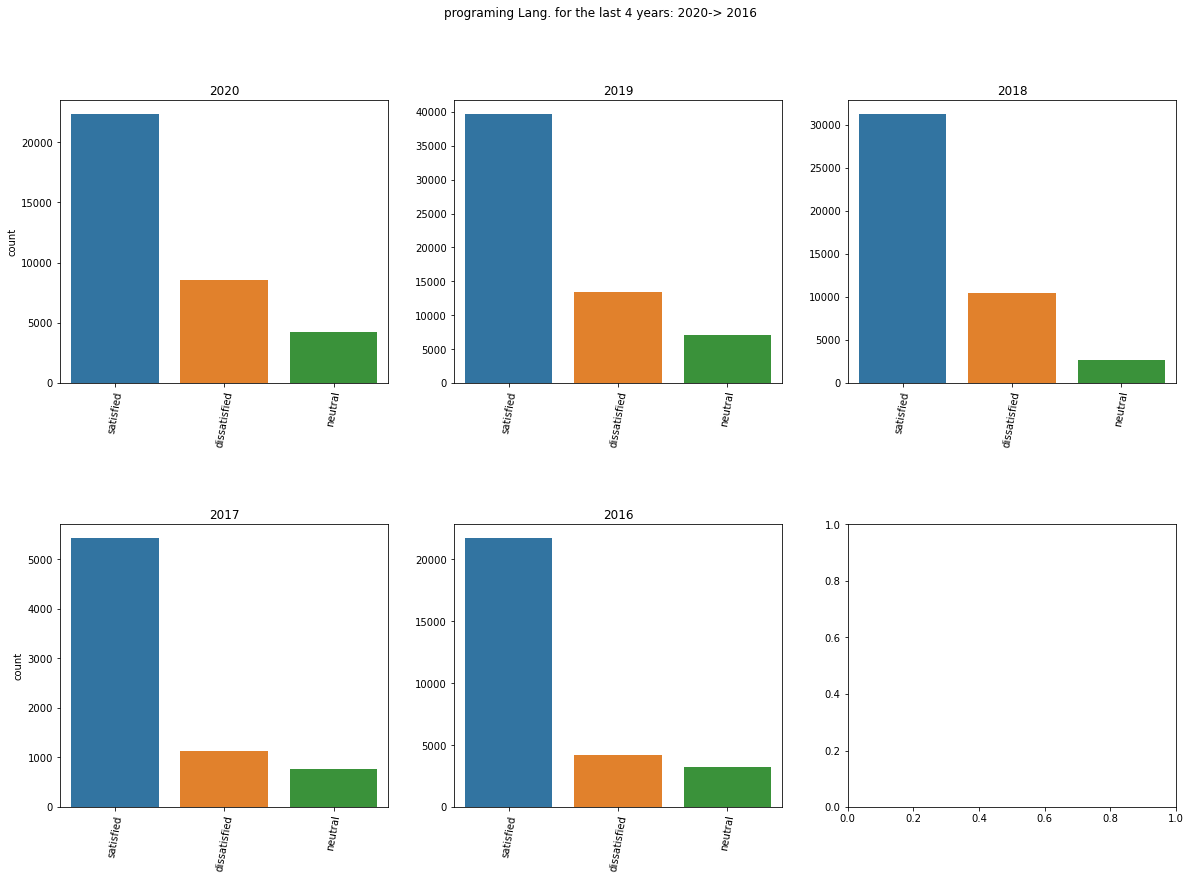

In [204]:
        #visualization of barplots accorss the 5 years, Programming languages count 
        
fig, axes = plt.subplots(2, 3, figsize=(20, 13))

fig.suptitle('programing Lang. for the last 4 years: 2020-> 2016')
plt.subplots_adjust(hspace=0.5)

g1 = sns.barplot(ax=axes[0, 0], data=df_empl_JobSat['df2020_empl_JobSat'], x='JobSatisfaction', y='count')
g1.set_xticklabels(g1.get_xticklabels(), rotation=80)
g1.set_title('2020')
g1.set_xlabel('')
        
g2 = sns.barplot(ax=axes[0, 1], data=df_empl_JobSat['df2019_empl_JobSat'], x='JobSatisfaction', y='count')
g2.set_xticklabels(g2.get_xticklabels(), rotation=80)
g2.set_title('2019')
g2.set_xlabel('')
g2.set_ylabel('')
        
g3 = sns.barplot(ax=axes[0, 2], data=df_empl_JobSat['df2018_empl_JobSat'], x='JobSatisfaction', y='count')
g3.set_xticklabels(g3.get_xticklabels(), rotation=80)
g3.set_title('2018')
g3.set_xlabel('')
g3.set_ylabel('')
        
g4 = sns.barplot(ax=axes[1, 0], data=df_empl_JobSat['df2017_empl_JobSat'], x='JobSatisfaction', y='count')
g4.set_xticklabels(g4.get_xticklabels(), rotation=80)
g4.set_title('2017')
g4.set_xlabel('')
        
g5 = sns.barplot(ax=axes[1, 1], data=df_empl_JobSat['df2016_empl_JobSat'], x='JobSatisfaction', y='count')
g5.set_xticklabels(g5.get_xticklabels(), rotation=80)
g5.set_title('2016')
g5.set_xlabel('')
g5.set_ylabel('');

***

Preparations and try-out to visualize line plots of percentages of different Job satisfactions categories 

In [209]:
df_empl_JobSat['df2016_empl_JobSat'][['count']].apply(lambda x: 100* x/ float(x.sum())).round(2)
#percentage computation

,count
0,74.54
1,14.40
2,11.06


In [210]:
df_empl_JobSat['df2016_empl_JobSat']

,JobSatisfaction,count
0,satisfied,21742
1,dissatisfied,4200
2,neutral,3226


In [211]:
keys

['df2016_empl_JobSat',
 'df2017_empl_JobSat',
 'df2018_empl_JobSat',
 'df2019_empl_JobSat',
 'df2020_empl_JobSat']

In [218]:
# compute precentages in df_empl_JobSat dataframes
y = 2016
for k in keys:
    df_empl_JobSat[k]['Percentages']=df_empl_JobSat[k][['count']].apply(lambda x: 100* x/ float(x.sum())).round(2)
    df_empl_JobSat[k]['year'] = y 
    y = y+ 1

In [219]:
df_empl_JobSat['df2016_empl_JobSat']

,JobSatisfaction,count,Percentages,year
0,satisfied,21742,74.54,2016
1,dissatisfied,4200,14.40,2016
2,neutral,3226,11.06,2016


In [220]:
my_dfs = [df_empl_JobSat[k] for k in keys] #storing all dfs in a list
df_employment_Satisfaction = pd.concat(my_dfs) #concatenating all dfs 
df_employment_Satisfaction

,JobSatisfaction,count,Percentages,year
0,satisfied,21742,74.54,2016
1,dissatisfied,4200,14.40,2016
2,neutral,3226,11.06,2016
0,satisfied,5432,74.09,2017
1,dissatisfied,1140,15.55,2017
2,neutral,760,10.37,2017
0,satisfied,31292,70.31,2018
1,dissatisfied,10519,23.64,2018
2,neutral,2694,6.05,2018
0,satisfied,39700,66.04,2019


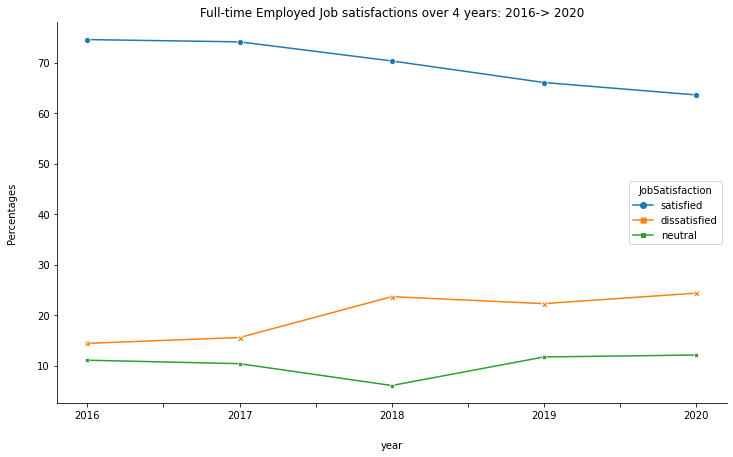

In [260]:
plt.figure(figsize=(12,7))
plt.title('Full-time Employed Job satisfactions over 4 years: 2016-> 2020')
ax = sns.lineplot(data=df_employment_Satisfaction, x="year", y="Percentages", hue="JobSatisfaction",dashes=False,
             markers=True, style='JobSatisfaction')
sns.despine(ax=ax , top=True, right=True, left=False, bottom=False)
ax.set_xticklabels(['','2016','','2017','','2018','','2019','','2020'])
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20;

Over the years, from 2016 to 2021, the job satisfaction for Full-time employee has declined from ~75% to ~65%. 
Nevertheless, the symmetry between the 2 lineploints (i.e. Neutral & dissatisfied) is clearly obvious. From 2016 to 2017 the downward trend in Neutral is reciprocated with an unpward trend with the Dissatisfied. This reciprocal nature between Neutral respondents and Dissatisfied is more exposed between 2017 and 2019.
For the sake of investigating the significance of the downward trend with satisfied respondent, a Chi-square goodness of fit can be conducted with the various proportion over the 4 years for this category.

Ho: the statisfied proportion of respondent is the same over the years from 2016 to 2020, the decrease is not significant.
H1: there is a significance in the decrease of Satisfied proportion of respondent.

In [272]:
#observed proportions of Satisfied over the years: we chose proportions not counts, since the sample size differ
# from year to year. proportion is more adequate and standardized. 

observed =[74.54, 74.09, 70.31, 66.04, 63.58]

In [271]:
(74.54+74.09+70.31+66.04+63.58)/5 # expected considering all proportions are the same. 

69.712

In [273]:
expected = [69.71, 69.712, 69.712, 69.712, 69.712]

In [274]:
import scipy.stats as stats

#perform Chi-Square Goodness of Fit Test
stats.chisquare(f_obs=observed, f_exp=expected)

Power_divergenceResult(statistic=1.3475307739394617, pvalue=0.8532611907182079)

p value is not less than 0.05 (5%), we fail to reject the Null hypothesis that claims: all satisfaction proportions over the years are the same and the decrease is not significant. 